## Genenerera FP som en vektor

In [5]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit import DataStructs
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.cm as cm
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage  
from rdkit.Chem import MACCSkeys

In [6]:
# importerar fil med namn,  och smiles m.m och gör en lista med alla smiles i den filen.
import json
with open('/Users/emmarydholm/brenda_cheminformatics/data/2019-04-02_substrate_cache.json', 'r') as f:
        data = json.loads(f.read())
        
smile = []
for i in data.values():
    if i != None:
        smile.append(i)


In [8]:
#smile = ['C[C@H](O)C([O-])=O', 'CCCCC(O)C([O-])=O', 'CCCCCCC(O)C([O-])=O', 'CCCCCCC(O)C([O-])=O', 'CCCCCCCCCCCCCCC(O)C([O-])=O', 'CC(O)C(O)=O', 'CSCCC(N)C(O)=O', 'C[C@H](N)C(O)=O', 'CC[C@H](C)[C@H](N)C(O)=O', 'C[C@H](O)C([O-])=O', 'CC(C)C[C@H](N)C(O)=O', 'NCCCC[C@H](N)C(O)=O', 'CSCC[C@H](N)C(O)=O', 'N[C@@H](Cc1ccccc1)C(O)=O', 'N[C@@H](Cc1c[nH]c2ccccc12)C(O)=O', 'N[C@@H](Cc1ccc(O)cc1)C(O)=O', 'CC(C)[C@H](N)C(O)=O', 'OCC([O-])=O', '[O-]C(=O)C=O', 'N[C@@H](CCO)C(O)=O', 'CC(O)C([O-])=O']

"""
Input: en fingerprint i bitform.
Delar upp bitsen i ett finger print och lägger in i en lista (bits), dessa uppdelade fp läggs in i en ytterligare lista kallad bit_lista. 
Denna kan användas som input sedan till PCA eller clustering. 
För de smilesen som ej kan converteras till fp, görs ett exception, då printas ett medelande ut angående vilken smile det gäller.
"""

smile_fp = {}

for i in smile:
    # Calculates the choosen fingerprint.
    try:
        mol=Chem.MolFromSmiles(i)
        #smile_fp[i] = AllChem.GetMorganFingerprintAsBitVect(mol,5).ToBitString()
        smile_fp[i] = MACCSkeys.GenMACCSKeys(mol)
    except: 
        print(f"An exception occured. {i} could not be converted.")

bit_lista = []
smile_lista = []


for key, value in smile_fp.items():
    bits = []
    for bit in value:
        bits.append(int(bit))
    bit_lista.append(bits)
    smile_lista.append(key)
    
## list(fp[i]), alternativ till bit_lista

An exception occured. [Fe+6]|1|2|3|[N-]4C5C=C6[N-]|1C(=CC7=N|2C(=Cc8[n-]|3c(C=C4C(=C5C(C)SCC(N)C(=O)NC)CC)c(C(C)SCC(N)C(=O)NC)c8C)C(=C7CCC(O)=O)C)C(=C6C)CCC(O)=O could not be converted.
An exception occured. O|[Co+3]|1|2|3|4|[N-]5C6[C@H](CC(N)=O)[C@@](C)(CCC(=O)NCC(C)O[P](O)(=O)OC7C(O)[C@H](O[C@H]7CO)n8cn|1c9cc(C)c(C)cc89)C5=C(C)C%10=N|2C(=CC%11=N|3C(=C(C)C%12=N|4[C@]6(C)[C@@](C)(CC(N)=O)[C@@H]%12CCC(N)=O)[C@@](C)(CC(N)=O)[C@@H]%11CCC(N)=O)C(C)(C)[C@@H]%10CCC(N)=O could not be converted.
An exception occured. [Fe+5]|1|2|3|[N-]4C5C=C6[N-]|1C(=CC7=N|2C(=Cc8[n-]|3c(C=C4C(=C5C(C)SCC(N)C(=O)NC)CC)c(C(C)SCC(N)C(=O)NC)c8C)C(=C7CCC(O)=O)C)C(=C6C)CCC(O)=O could not be converted.
An exception occured. [Fe+4]|1|2|3|[N-]4C5C=C6[N-]|1C(=C(CCC(O)=O)C6C)C=C7[N-]|2C(=CC8[N-]|3C(=CC4C(C=C)C5C)C(C)C8C=C)C(C)C7CCC(O)=O could not be converted.
An exception occured. [Co]|1|2|3|N4=C5CC6=N|1C(=C(C)C7=N|2C(C)(C8N|3=C(C(C)C4C(CCC(O)=O)C5(C)C)C(C)(CCC(O)=O)C8CC(O)=O)C(C)(CC(N)=O)C7CCC(O)=O)C(C)(CC(N)=O)C6CCC(O)

array([[-2.67286081,  1.97028134,  1.12643635, ...,  0.15412543,
        -0.07486278, -0.1528036 ],
       [ 1.19304076,  0.93908925,  1.973825  , ...,  0.39109606,
        -0.00860699,  0.24825055],
       [ 0.59469623, -1.55479589,  1.28748133, ..., -0.32261576,
         0.22790925,  0.16343394],
       ...,
       [-1.02597116,  3.25100906,  0.03561576, ..., -0.16226318,
         0.06677609,  0.14941454],
       [-2.15761257,  0.99620384, -0.50569702, ...,  0.00451312,
         0.0368448 ,  0.06820782],
       [-0.39632873,  0.46933052,  0.29461773, ...,  0.30889532,
        -0.47734146,  0.4230557 ]])

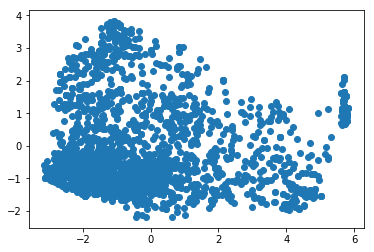

In [9]:
from sklearn.decomposition import PCA
from sklearn import decomposition

X = np.array(bit_lista)
pca = PCA(n_components=50).fit_transform(X)

plt.scatter(pca[:,0],pca[:,1])

pca

## t-SNE på datan


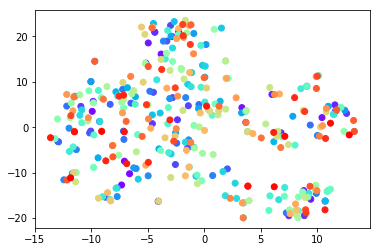

In [10]:
"""
Perplexity: Typical values for the perplexity range between 5 and 50. Larger dataset, larger perplexity. 
Perplexity should be smaller than the number of points.A second feature of t-SNE is a tuneable parameter, “perplexity,” which says (loosely) how to balance attention between local and global aspects of your data. 
The parameter is, in a sense, a guess about the number of close neighbors each point has.

Learning rate: the number of iterations. Different for different datasets, often needs some iteration to get a good plot.
If the data looks like a cloud or a blob learning rate is often too low.

metric = eucladian är default, jaccard bättre för binära, men om input är från pca är det inte binärt längre, så ska man ändå använda eucladian?
om input kommer rakt från bitstringen borde man använda jaccard istället! metric = 'jaccard'

Endast klustra med tSNE och jaccard eller hamming metric, borde resultera i ungefär samma sak som att räkna ut ett tanimoto score? 
Då den också räknar ut en distance på liknande sätt.
"""

X = np.array(pca[0:350]) 
X_embedded = TSNE(n_components = 2, perplexity = 40.0,learning_rate = 1000.0).fit_transform(X)

plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c = cm.rainbow(np.linspace(0, 1, len(X))))


### Clustra med K-means

In [ ]:
#Behöver ha en metod för att räkna ut det optimala antalet kluster om denna ska användas: exempel elbow

data= X_embedded
X = np.array(data)
kmeans = KMeans(n_clusters=10, random_state=0).fit(X)
 

plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow', label = smile)  
display()

print(kmeans.labels_)

In [ ]:
"""
k means determine k, optimal number of clusters for k-means, 
the point where there is an elbow, sometimes not very clear. 
The elbow is the point where there is the longest distance to a line drawn from the first and last point.
"""
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np

distortions = []
K = range(1,50)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X_embedded)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

## Clustering with Agglomerative Clustering Algorithm

In [13]:
data= X_embedded
X = np.array(data)
clustering = AgglomerativeClustering(n_clusters=10, linkage = 'average', affinity = 'cosine').fit(bit_lista)

clustering.labels_
plt.scatter(X[:,0],X[:,1], c=clustering.labels_, cmap='rainbow')
display()

ValueError: The condensed distance matrix must contain only finite values.

## Träd

In [ ]:
data= X_embedded
X = np.array(data)

# https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering
linked = linkage(X, 'ward')

labelList = range(0, len(X))

plt.figure(figsize=(12, 6))  
dendrogram(linked,  
            orientation='top',
            labels=labelList,
            distance_sort='ascending',
            show_leaf_counts=True)
display()

[0 0 0 ... 0 0 0]


ValueError: 'c' argument has 2181 elements, which is not acceptable for use with 'x' with size 350, 'y' with size 350.

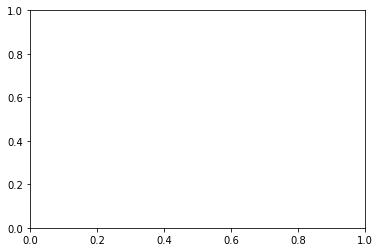

In [15]:
#DBSCAN men verkar inte fungera på vårt data set, alla hamnar i samma eller helt olika beroende på hur man klustrar

from sklearn.cluster import DBSCAN

X = np.array(X_embedded)
clustering = DBSCAN( eps=3, min_samples=10, metric = 'jaccard').fit(np.array(bit_lista))
print(clustering.labels_)
#print(clustering) 

plt.scatter(X[:,0],X[:,1], c=clustering.labels_, cmap='rainbow')
display()

## RDKit cluster
 Detta är troligen mindre bra än de andra clustering metoderna pga att det inte går att visualisera på samma sätt. 
 Kan fungera bra på mindre data sätt bara för att dela in de i kluster, då borde de även gå att visualisera.

In [ ]:
# Lite buggig. 

smiles_fps = {}
for i in smile:
    # Calculates the choosen fingerprint.
    try:
        mol=Chem.MolFromSmiles(i)
        smiles_fps[i] = AllChem.GetMorganFingerprintAsBitVect(mol,5)
        
    except: 
        print(f"An exception occured. {i} could not be converted.")


fp=[]
smiles_ = []
for key, value in smiles_fps.items():
    fp.append(value)
    smiles_.append(key)



In [ ]:
#def ClusterFps(fps,cutoff=0.7):
from rdkit import DataStructs
from rdkit.ML.Cluster import Butina
from rdkit import DataStructs
cutoff = 0.7
# first generate the distance matrix:
dists = []
nfps = len(smiles_fps)
for i in range(1,nfps):
        
    sims = DataStructs.BulkTanimotoSimilarity(fp[i],fp[:i])
    dists.extend([1-x for x in sims])

# now cluster the data:
cluster = Butina.ClusterData(dists,nfps,cutoff,isDistData=True)


In [ ]:
counter = 0
coulour_li = ['#']*nfps
for t in cluster:
    for numb in t:
  
        coulour_li[numb] = counter
    counter +=1

plt.scatter(X[:,0],X[:,1], c=coulour_li, cmap='rainbow')